# Time series Model Example Notebook

This notebook helps in understanding how to use a time series model from DXC Industrialized AI Starter library. In this example we have used monthly sales data. 
Data source ref: https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv

In [ ]:
#Install the DXC_Industrialized-AI-Starter Package.
%%capture
#!pip install DXC-Industrialized-AI-Starter

#or

!pip install git+https://github.com/dxc-technology/DXC-Industrialized-AI-Starter.git

From DXC-Industrialized-AI-Starter library import dxc-ai package

In [1]:
from dxc import ai

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

Using older than supported version of lightgbm, please upgrade to version greater than 2.2.1


## Access the raw data

In [2]:
#reads csv from a url and loads it into a dataframe
csv_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv'
raw_data = ai.read_data_frame_from_remote_csv(csv_url, col_names = [], delim_whitespace=False, header = 'infer')
raw_data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


## Clean the raw data

This method imputes missing data, cleans the column headings, removes empty rows and columns

In [3]:
#clean the data
impute = True
clean_data = ai.clean_dataframe(raw_data, impute)
clean_data.head()

,month,sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


## Explore the raw data

If you want to explore your data through visualization then you can use the below visulations functions.

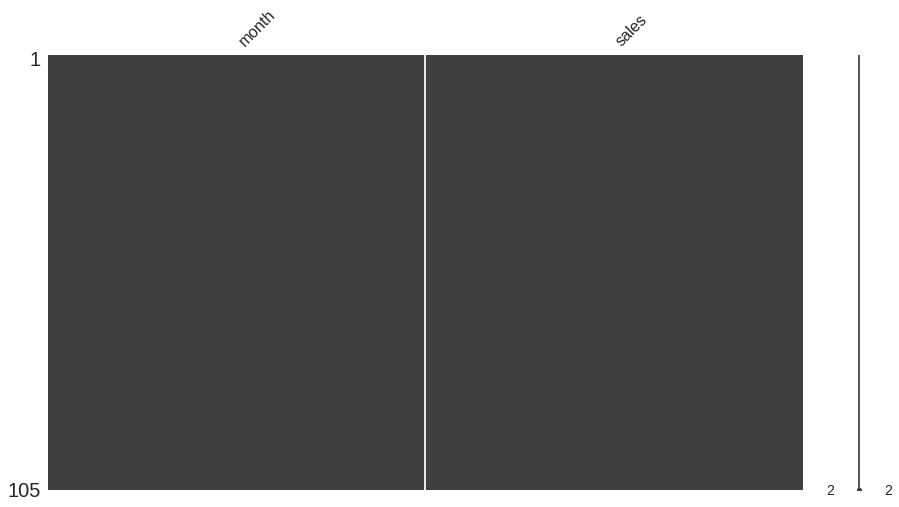

In [4]:
ai.visualize_missing_data(clean_data)

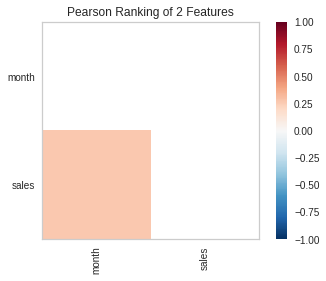

In [5]:
ai.explore_features(clean_data)

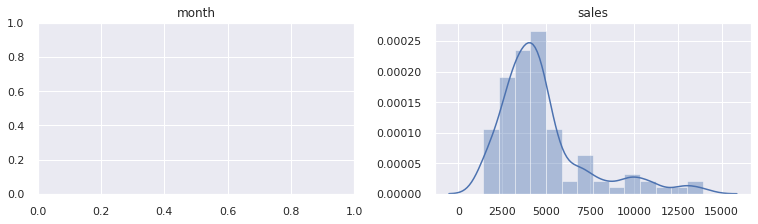

In [6]:
ai.plot_distributions(clean_data)

## Run Time series experiment

This function executes an experiment on Time series model. Update experiment_design with parameters that fit your project. The data parameter should be same as the refined training data. The model parameter must be a timeseries. The labels parameter indicates the column of the data dataframe which has time series data. Here defining your meta data is optional. By deafult this model consider last 7 historical values for evaluation of results. Based on those results this model automatically selects best model for your data.

In [8]:
experiment_design = {
    #model options include ['regression()', 'classification()']
    "model": 'timeseries',
    "labels": clean_data.sales,
    "data": clean_data,
    #Tell the model which column is 'output'
    #Also note columns that aren't purely numerical
    #Examples include ['nlp', 'date', 'categorical', 'ignore']
    "meta_data": {
      "Sales": "output",
      "Month": "date"
  }
}
trained_model = ai.run_experiment(experiment_design, verbose = True)

autoRegressiveModel
                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                   97
Model:                         AR(12)   Log Likelihood                -680.757
Method:                          cmle   S.D. of innovations            727.761
Date:                Sun, 05 Jul 2020   AIC                             13.509
Time:                        20:20:41   BIC                             13.912
Sample:                             0   HQIC                            13.671
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1441.8888    620.817      2.323      0.020     225.111    2658.667
L1.y           0.1017      0.057      1.796      0.072      -0.009       0.213
L2.y          -0.1041      0.057


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exog

In [12]:
#Predicting the future results for next 8 instances.
predictions = trained_model.predict(len(clean_data)-8,len(clean_data)+8)
print(predictions)

[ 4122.46472382  4717.54543353  5156.13160207  4969.38215431
  4741.0957225   1532.67612872  6082.24200573  7281.73079667
 10041.9325823  12871.96309806  4692.51614504  3426.52629856
  3892.99956271  4754.95390661  5253.7296647   5066.28589882
  4818.35584209]




Visual represntation for model prediction values vs original values



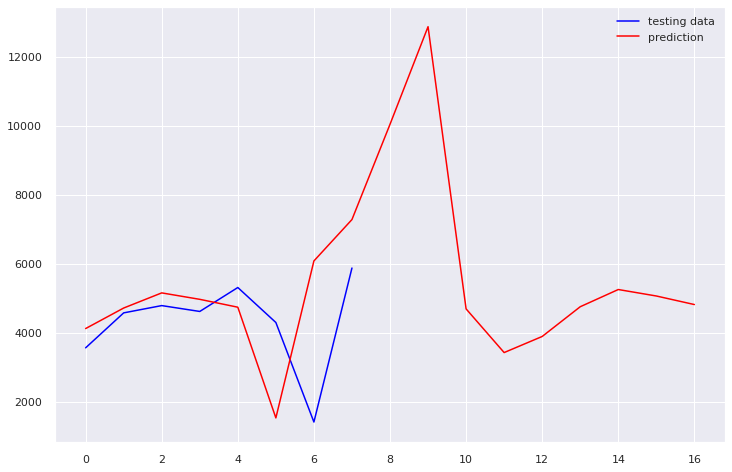

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(list(clean_data['sales'].tail(8)) , color = "blue" , label = "testing data")
plt.plot(predictions, color='red' , label = "prediction")
plt.legend(loc='best')
plt.show()